In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Fuel_Consumption.csv", encoding='latin-1')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
df = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

In [5]:
df.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


In [6]:
myhists = df[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]

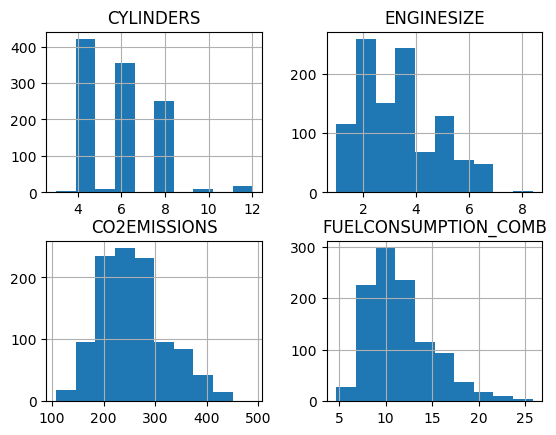

In [7]:
myhists.hist()
plt.show()

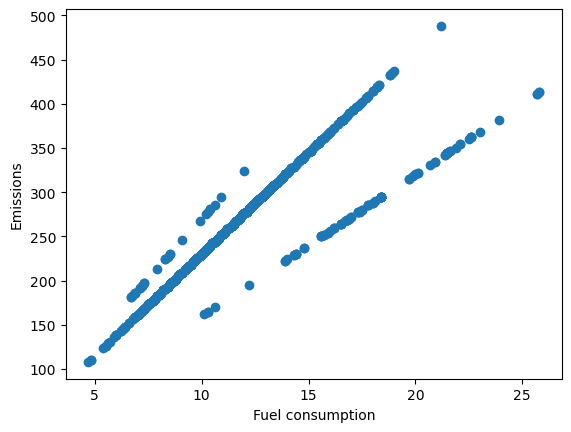

In [9]:
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS)
plt.xlabel("Fuel consumption")
plt.ylabel("Emissions")
plt.show()

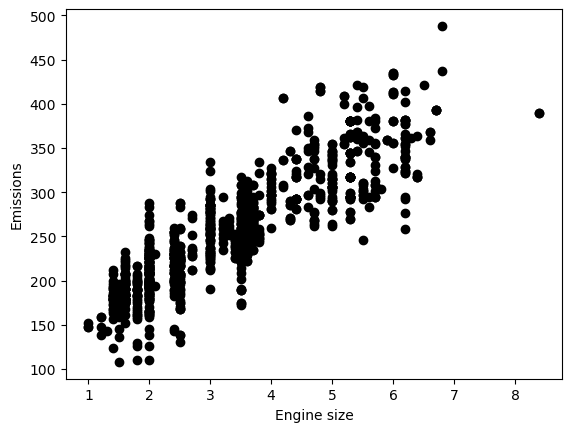

In [11]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS, c='black')
plt.xlabel("Engine size")
plt.ylabel("Emissions")
plt.show()

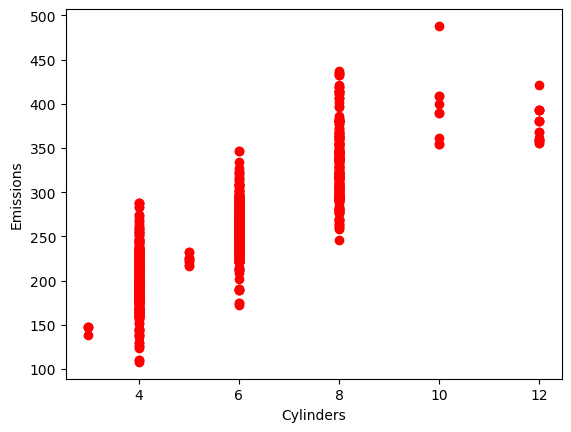

In [12]:
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS, c="red")
plt.xlabel("Cylinders")
plt.ylabel("Emissions")
plt.show()

In [13]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

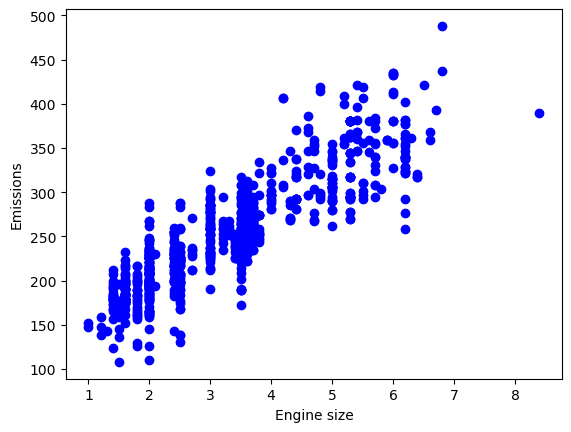

In [14]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, c='b')
plt.xlabel("Engine size")
plt.ylabel("Emissions")
plt.show()

In [15]:
from sklearn import linear_model

In [16]:
sr = linear_model.LinearRegression()

In [18]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

In [19]:
sr.fit(train_x, train_y)

LinearRegression()

In [23]:
print("Coefficients : ", sr.coef_)
print("Intercept : ", sr.intercept_)

Coefficients :  [[39.62038748]]
Intercept :  [123.40897569]


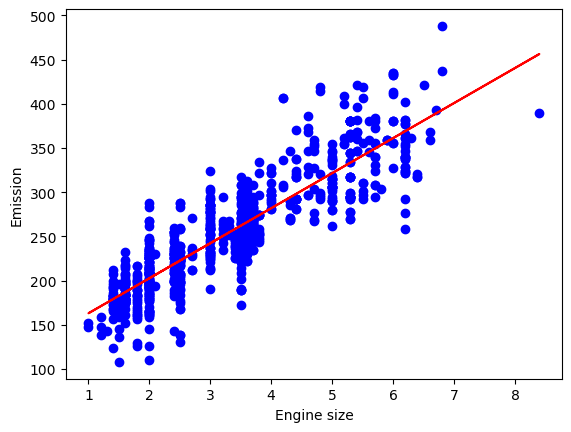

In [27]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, c='b')
plt.plot(train_x, sr.coef_[0][0]*train_x + sr.intercept_[0], c='r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [29]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [30]:
from sklearn.metrics import r2_score

In [32]:
predictions = sr.predict(test_x)
print("MAE %.2f" %np.mean(np.absolute(predictions - test_y)))
print("MSE %2.f" %np.mean((predictions - test_y)**2))
print("R2-score %.2f" % r2_score(test_y, predictions))

MAE 25.99
MSE 1135
R2-score 0.73


In [34]:
train_x = train[["FUELCONSUMPTION_COMB"]]
test_x = test[["FUELCONSUMPTION_COMB"]]

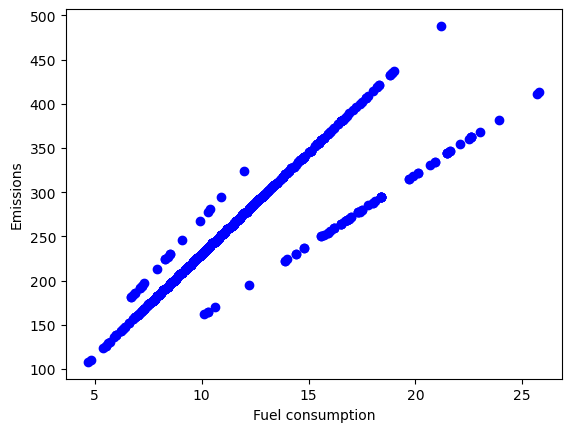

In [35]:
plt.scatter(train_x, train_y, c='b')
plt.xlabel("Fuel consumption")
plt.ylabel("Emissions")
plt.show()

In [36]:
sr = linear_model.LinearRegression()

In [37]:
sr.fit(train_x, train_y)

LinearRegression()

In [38]:
predictions = sr.predict(test_x)


In [39]:
predictions = sr.predict(test_x)
print("MAE %.2f" %np.mean(np.absolute(predictions - test_y)))
print("MSE %2.f" %np.mean((predictions - test_y)**2))
print("R2-score %.2f" % r2_score(test_y, predictions))

MAE 20.78
MSE 854
R2-score 0.79


In [40]:
train_x = train[["CYLINDERS"]]
test_x = test[["CYLINDERS"]]

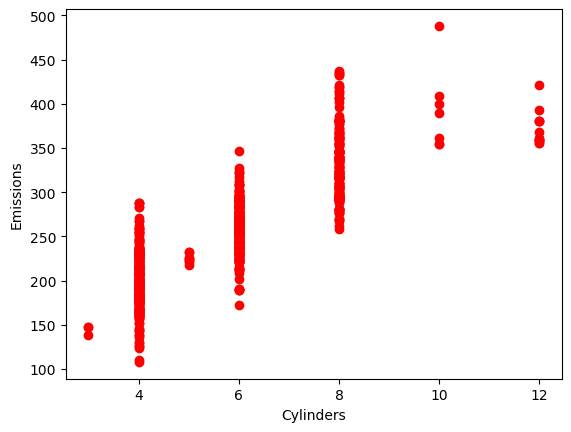

In [41]:
plt.scatter(train_x, train_y, c='r')
plt.xlabel("Cylinders")
plt.ylabel("Emissions")
plt.show()

In [42]:
sr = linear_model.LinearRegression()

In [43]:
sr.fit(train_x, train_y)

LinearRegression()

In [44]:
predictions = sr.predict(test_x)

In [45]:
predictions = sr.predict(test_x)
print("MAE %.2f" %np.mean(np.absolute(predictions - test_y)))
print("MSE %2.f" %np.mean((predictions - test_y)**2))
print("R2-score %.2f" % r2_score(test_y, predictions))

MAE 26.71
MSE 1209
R2-score 0.71
